In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dosya_yolu="/workspaces/HR_Analysis_Project/hr_dataset.csv"
df=pd.read_csv(dosya_yolu)
df.head()

,Employee_ID,Name,Age,Gender,Department,Position,Years_at_Company,Salary,Education_Level,Performance_Score,...,Remote_Work,Sick_Days_in_Last_Year,Promotion_Last_5_Years,Left_Company,Work_Life_Balance_Score,Job_Satisfaction_Score,Previous_Employer_Count,Favorite_Color,Hobby,Estimated_Annual_Bonus
0,1,Hüseyin,57.0,Male,Sales,Senior,38,NaN,Master,3,...,True,0,True,False,2,4,9,Green,Gaming,NaN
1,2,Fatma,NaN,Male,Marketing,Manager,8,54234.0,PhD,3,...,False,10,True,True,5,7,0,Yellow,Traveling,5193.274541
2,3,Ali,49.0,Male,Marketing,Intern,17,NaN,Bachelor,4,...,False,8,True,True,6,8,5,White,Music,NaN
3,4,Hüseyin,36.0,Male,IT,Junior,35,126284.0,PhD,3,...,True,6,True,True,3,9,3,Black,Sports,9139.923382
4,5,Mehmet,23.0,Male,Finance,Senior,39,52322.0,Master,1,...,False,13,False,False,2,5,7,Red,Traveling,2963.943736


VERİ SETİNİ KEŞFEDELİM

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee_ID              10000 non-null  int64  
 1   Name                     10000 non-null  object 
 2   Age                      9500 non-null   float64
 3   Gender                   10000 non-null  object 
 4   Department               9700 non-null   object 
 5   Position                 10000 non-null  object 
 6   Years_at_Company         10000 non-null  int64  
 7   Salary                   9000 non-null   float64
 8   Education_Level          10000 non-null  object 
 9   Performance_Score        10000 non-null  int64  
 10  Marital_Status           10000 non-null  object 
 11  Has_Children             10000 non-null  bool   
 12  Working_Hours_per_Week   10000 non-null  int64  
 13  Remote_Work              10000 non-null  bool   
 14  Sick_Days_in_Last_Year 

#Açıklayıcı İstatiksel Bilgilere Bakalım

Açıklayıcı istatiksel bilgiler numeric ve object tipteki datalarda farklı bilgiler verir. bunun  için veri setindeki sütunları numeric ve object olarak ayırmam gerekiyor. bu işlem yapıldıktan sonra ayrı ayrı istatiksel bilgilere bakacağız.

In [6]:
numeric_sütunlar=[
    sütun
    for sütun in df.columns
    if df[sütun].dtype in ["int64","float64"]
]
df[numeric_sütunlar]

,Employee_ID,Age,Years_at_Company,Salary,Performance_Score,Working_Hours_per_Week,Sick_Days_in_Last_Year,Work_Life_Balance_Score,Job_Satisfaction_Score,Previous_Employer_Count,Estimated_Annual_Bonus
0,1,57.0,38,NaN,3,31,0,2,4,9,NaN
1,2,NaN,8,54234.0,3,45,10,5,7,0,5193.274541
2,3,49.0,17,NaN,4,47,8,6,8,5,NaN
3,4,36.0,35,126284.0,3,47,6,3,9,3,9139.923382
4,5,23.0,39,52322.0,1,42,13,2,5,7,2963.943736
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,63.0,8,123268.0,3,53,6,1,3,8,17189.899795
9996,9997,41.0,4,110551.0,3,53,2,4,4,7,9860.980842
9997,9998,46.0,3,118467.0,1,59,4,2,3,6,11478.411883
9998,9999,21.0,8,121164.0,1,57,2,9,9,1,6298.654648


In [7]:
object_sütunlar=[
    sütun
    for sütun in df.columns
    if df[sütun].dtype in ["object"] #veya if df[sütun].dtype=="0"
]
df[object_sütunlar]

,Name,Gender,Department,Position,Education_Level,Marital_Status,Favorite_Color,Hobby
0,Hüseyin,Male,Sales,Senior,Master,Divorced,Green,Gaming
1,Fatma,Male,Marketing,Manager,PhD,Single,Yellow,Traveling
2,Ali,Male,Marketing,Intern,Bachelor,Single,White,Music
3,Hüseyin,Male,IT,Junior,PhD,Married,Black,Sports
4,Mehmet,Male,Finance,Senior,Master,Married,Red,Traveling
...,...,...,...,...,...,...,...,...
9995,Fatma,Female,Finance,Senior,High School,Married,White,Sports
9996,Mehmet,Female,Operations,Junior,PhD,Married,Green,Gaming
9997,Emine,Female,Operations,Intern,Master,Single,Red,Reading
9998,Emine,Female,HR,Senior,Master,Single,Green,Music


In [8]:
df[numeric_sütunlar].describe().T

,count,mean,std,min,25%,50%,75%,max
Employee_ID,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Age,9500.0,40.862737,13.433499,18.000000,30.000000,41.000000,53.000000,64.000000
Years_at_Company,10000.0,19.502500,11.588478,0.000000,9.000000,20.000000,29.000000,39.000000
Salary,9000.0,89832.444778,34580.446485,30002.000000,59597.000000,89414.500000,119852.000000,149952.000000
Performance_Score,10000.0,2.508400,1.126080,1.000000,1.000000,2.500000,4.000000,4.000000
Working_Hours_per_Week,10000.0,39.669800,11.617360,20.000000,30.000000,40.000000,50.000000,59.000000
Sick_Days_in_Last_Year,10000.0,7.074900,4.313554,0.000000,3.000000,7.000000,11.000000,14.000000
Work_Life_Balance_Score,10000.0,4.987400,2.587800,1.000000,3.000000,5.000000,7.000000,9.000000
Job_Satisfaction_Score,10000.0,4.983400,2.587275,1.000000,3.000000,5.000000,7.000000,9.000000
Previous_Employer_Count,10000.0,4.471400,2.887424,0.000000,2.000000,4.000000,7.000000,9.000000


In [9]:
df[object_sütunlar].describe().T

,count,unique,top,freq
Name,10000,8,Ali,1271
Gender,10000,2,Female,5032
Department,9700,6,Sales,1737
Position,10000,5,Senior,2020
Education_Level,10000,4,Bachelor,2535
Marital_Status,10000,3,Married,3354
Favorite_Color,10000,6,White,1701
Hobby,10000,5,Traveling,2121


Eksik Veriler ile Uğraşalım

eksik veri sayısına bakalım

In [10]:
df.isnull().sum()

Employee_ID                   0
Name                          0
Age                         500
Gender                        0
Department                  300
Position                      0
Years_at_Company              0
Salary                     1000
Education_Level               0
Performance_Score             0
Marital_Status                0
Has_Children                  0
Working_Hours_per_Week        0
Remote_Work                   0
Sick_Days_in_Last_Year        0
Promotion_Last_5_Years        0
Left_Company                  0
Work_Life_Balance_Score       0
Job_Satisfaction_Score        0
Previous_Employer_Count       0
Favorite_Color                0
Hobby                         0
Estimated_Annual_Bonus     1000
dtype: int64

In [11]:
eksik_veri_oranı=pd.isnull(df).mean() #her sütunun yüzdesel olarak eksik veri oranını aldık
eksik_veri_oranı

Employee_ID                0.00
Name                       0.00
Age                        0.05
Gender                     0.00
Department                 0.03
Position                   0.00
Years_at_Company           0.00
Salary                     0.10
Education_Level            0.00
Performance_Score          0.00
Marital_Status             0.00
Has_Children               0.00
Working_Hours_per_Week     0.00
Remote_Work                0.00
Sick_Days_in_Last_Year     0.00
Promotion_Last_5_Years     0.00
Left_Company               0.00
Work_Life_Balance_Score    0.00
Job_Satisfaction_Score     0.00
Previous_Employer_Count    0.00
Favorite_Color             0.00
Hobby                      0.00
Estimated_Annual_Bonus     0.10
dtype: float64

In [12]:
dolduralacak_eksik_veriler=eksik_veri_oranı[(eksik_veri_oranı<0.5)&(eksik_veri_oranı>0.00)].index
dolduralacak_eksik_veriler

Index(['Age', 'Department', 'Salary', 'Estimated_Annual_Bonus'], dtype='object')

sayısal eksik verileri doldurma

sayısal eksik verileri doldurma

In [13]:
def eksik_veri_doldurma(sütun:str):
    return df[sütun].fillna(df[sütun].mean(), inplace=True)

eksik_veri_doldurma('Age')
eksik_veri_doldurma('Salary')
eksik_veri_doldurma('Estimated_Annual_Bonus')

/tmp/ipykernel_9393/3147782140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  return df[sütun].fillna(df[sütun].mean(), inplace=True)


In [14]:
#object sütunun eksik verisini doldurma
df['Department'].fillna(df['Department'].mode()[0],inplace=True)

/tmp/ipykernel_9393/1123782611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Department'].fillna(df['Department'].mode()[0],inplace=True)


In [15]:
df['Department'].mode([0])

0    Sales
Name: Department, dtype: object

In [16]:
df['Department'].mode()[0]

'Sales'

In [17]:
df.isnull().sum()

Employee_ID                0
Name                       0
Age                        0
Gender                     0
Department                 0
Position                   0
Years_at_Company           0
Salary                     0
Education_Level            0
Performance_Score          0
Marital_Status             0
Has_Children               0
Working_Hours_per_Week     0
Remote_Work                0
Sick_Days_in_Last_Year     0
Promotion_Last_5_Years     0
Left_Company               0
Work_Life_Balance_Score    0
Job_Satisfaction_Score     0
Previous_Employer_Count    0
Favorite_Color             0
Hobby                      0
Estimated_Annual_Bonus     0
dtype: int64

ÖZELLİK MÜHENDİSLİĞİ--FEATURE ENGİNEERİNG

Var olan sütunların değerlerini inceleyerek yeni sütunlar üretebilmektir. burada yeni sütun üretebilmek için aşağıdaki maddeler aranır.
*oluşturulan yeni sütunun veri setiyle ilişkili olması beklenir
*oluşturulan yeni sütunun eski sütundan daha iyi analiz edilebilir bir yapıda olması beklenir
*oluşturulan yeni sütunun eski sütundan veya sütunlardan daha zengin anlam çıkarması beklenir

eğer sayılabilen bir sayısal veri varsa bu veriyi belli aralıklar içerisinde yeni bir sütun olarak oluşturursak daha anlamlı bir bilgi çıkarabiliriz

In [18]:
df['Age'].value_counts().sort_index()

Age
18.000000    192
19.000000    201
20.000000    195
21.000000    202
22.000000    196
23.000000    197
24.000000    191
25.000000    202
26.000000    208
27.000000    212
28.000000    171
29.000000    192
30.000000    232
31.000000    202
32.000000    226
33.000000    228
34.000000    232
35.000000    217
36.000000    205
37.000000    197
38.000000    210
39.000000    208
40.000000    216
40.862737    500
41.000000    206
42.000000    186
43.000000    219
44.000000    199
45.000000    213
46.000000    205
47.000000    193
48.000000    206
49.000000    187
50.000000    199
51.000000    185
52.000000    182
53.000000    198
54.000000    204
55.000000    200
56.000000    227
57.000000    181
58.000000    195
59.000000    211
60.000000    179
61.000000    226
62.000000    200
63.000000    177
64.000000    190
Name: count, dtype: int64

In [19]:
df['Yaş_Grupları']=pd.cut(df['Age'],[18,25,35,45,55,65],labels=["18-25","26-35","36-45","46-55","56-65"])
df['Yaş_Grupları'].value_counts()

Yaş_Grupları
36-45    2559
26-35    2120
46-55    1959
56-65    1786
18-25    1384
Name: count, dtype: int64

In [20]:
df.head().T

,0,1,2,3,4
Employee_ID,1,2,3,4,5
Name,Hüseyin,Fatma,Ali,Hüseyin,Mehmet
Age,57.0,40.862737,49.0,36.0,23.0
Gender,Male,Male,Male,Male,Male
Department,Sales,Marketing,Marketing,IT,Finance
Position,Senior,Manager,Intern,Junior,Senior
Years_at_Company,38,8,17,35,39
Salary,89832.444778,54234.0,89832.444778,126284.0,52322.0
Education_Level,Master,PhD,Bachelor,PhD,Master
Performance_Score,3,3,4,3,1


#2. Özellik mühendisliği
çalışanın aylık maaşı ile şirkette kaç yıl çalıştığının oranını alırsak bu çalışan hakkında daha fazla bilgiye erişmiş oluruz

In [21]:
df['Aidiyetlik_Miktarı']=(df['Salary']/df['Years_at_Company'])
df['Aidiyetlik_Miktarı']

0        2364.011705
1        6779.250000
2        5284.261458
3        3608.114286
4        1341.589744
            ...     
9995    15408.500000
9996    27637.750000
9997    39489.000000
9998    15145.500000
9999     1887.294118
Name: Aidiyetlik_Miktarı, Length: 10000, dtype: float64

3. ÖZELLİK MÜHENDİSLİĞİ    
var olan veri çeşidi içerisinden sadece ihtiyaç duyulan kısıtlı bilgiye erişim sağlamak istenirse veri mühendisliği kullanılması gerekir.

position sütunun içerisinden ben sadece senior olanları almak istiyorum. bunun veri mühendisliğini yapalım.

In [22]:
df['Position'].unique()

array(['Senior', 'Manager', 'Intern', 'Junior', 'Team Lead'], dtype=object)

In [23]:
df['Senyör_mü'] = np.where(df['Position'].isin(['Manager','Team Lead','Senior']),1,0)  #eğer senior sütunun içerisindeki değerlerde maneger,i team lead, senior bunlar varsa 1 yaz, yoksa 0 yaz
df['Senyör_mü']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: Senyör_mü, Length: 10000, dtype: int64

4. ÖZELLİK MÜHENDİSLİĞİ

2'den çok sütünlar arasında sorular sorarak ve soruların cevaplarını alarak ilişki kurma yöntemine ağaçlandırma modeli denir. bu şekilde çok kapsamlı bir mühendislikle yeni sütunlar oluşturulabilir.

In [24]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married'], dtype=object)

In [25]:
df['Has_Children'].value_counts()

Has_Children
True     5007
False    4993
Name: count, dtype: int64

In [26]:
df['Aile_Durumu']=np.where((df['Marital_Status']=='Married')&(df['Has_Children']),'Evli ve çocuk sahibi','Diğerleri')
df['Aile_Durumu'].value_counts()

Aile_Durumu
Diğerleri               8289
Evli ve çocuk sahibi    1711
Name: count, dtype: int64

#5. ÖZELLİK MÜHENDİSLİĞİ

hastalık bahanesiyle uzaktan çalışanlara göz atalım; (dolandırılıcık "Freud" analiz için kullanılır)

In [27]:
df['Remote_Work'] #uzaktan çalışıyorsa True, çalışmıyosa false verir

0        True
1       False
2       False
3        True
4       False
        ...  
9995    False
9996     True
9997    False
9998     True
9999     True
Name: Remote_Work, Length: 10000, dtype: bool

uzaktan çalışanların hasta oldukları günlere oranına bakalım

In [ ]:
#eğer çalışan uzaktan çalışan biriyse; uzaktan çalışma/hastalık günleri oranına bakıp çalışma verimliliği bilgisini elde ediyoruz
df['uzaktan_çalışanların_hasta_gün_oranları']=np.where(['Remote_Work'],df['Sick_Days_in_Last_Year']/(df['Working_Hours_per_Week']+1),0)
df['uzaktan_çalışanların_hasta_gün_oranları']

0       0.000000
1       0.217391
2       0.166667
3       0.125000
4       0.302326
          ...   
9995    0.111111
9996    0.037037
9997    0.066667
9998    0.034483
9999    0.195652
Name: uzaktan_çalışanların_hasta_gün_oranları, Length: 10000, dtype: float64

az gün hasta olan 1.3 gösterdi
çok gün hasta olan 1.5 gösterdi
10 gün hasta olan 40 saat çalışanın oranı 1.25
10 gün hasta olan,30 saat çalışanın oranı 1.33

1'den sonra değer ne kadar fazla yükselirse çalışanın tembel olma ihtimali yada hastalık bahanesiyle uzaktan çalışma ihtimali doğru orantılı olarak artıyor

In [32]:
df['Uzaktan_Çalışanların_Hasta_Gün_Oranlari'] = np.where(df['Remote_Work'],(df['Sick_Days_in_Last_Year']/df['Working_Hours_per_Week'] + 1),0)
df[['Name','Working_Hours_per_Week','Sick_Days_in_Last_Year','Remote_Work','Uzaktan_Çalışanların_Hasta_Gün_Oranlari']].tail(20)

,Name,Working_Hours_per_Week,Sick_Days_in_Last_Year,Remote_Work,Uzaktan_Çalışanların_Hasta_Gün_Oranlari
9980,Fatma,46,8,False,0.000000
9981,Emine,55,1,False,0.000000
9982,Elif,20,6,True,1.300000
9983,Mehmet,35,5,True,1.142857
9984,Ayşe,23,7,False,0.000000
9985,Fatma,42,2,False,0.000000
9986,Ali,51,5,False,0.000000
9987,Emine,22,10,False,0.000000
9988,Emine,40,1,False,0.000000
9989,Ali,43,12,True,1.279070


#6. GRUPLAMA

cinsiyetlere göre gruplama yapın ve hangi cinsiyetin 'Uzaktan_Çalışanların_Hasta_Gün_Oranlari' sütununun ortalamasını alarak cinsiyetin tembellikle ilgili bir ilişki varmı yok mu yorumla

In [39]:
df.groupby('Gender')['Uzaktan_Çalışanların_Hasta_Gün_Oranlari'].mean().sort_values()

Gender
Male      0.597908
Female    0.604254
Name: Uzaktan_Çalışanların_Hasta_Gün_Oranlari, dtype: float64

In [ ]:
#KORELASYON (sütunlar arasında ilişki bakma durumu)

korelasyon sütunların birbiriyle olan ilişkilerini gösterir. eğer sütunlar arasında doğru orantılı bir ilişki varsa burada korelasyon kat sayısı yüksektir ve sıcak renkler gözükür. eğer sütunlar arasında ters orantı varsa korelasyon katsayısı düşüktür ve soğuk renkler gözükür.

KORELASYON KULLANMA SENARYOLARI
özellik mühendisliğinden sonra yeni oluşturulan sütunların diğer sütunlarla ilişkisini inceleyerek özellik mühendisliğinin kalitesi ölçülür.
verileri kapsamlı bir şekilde incelemek için bütün sütunlar arasındaki ilişkilere bakılır.

#KORELASYON MATRİSİ

<Axes: >

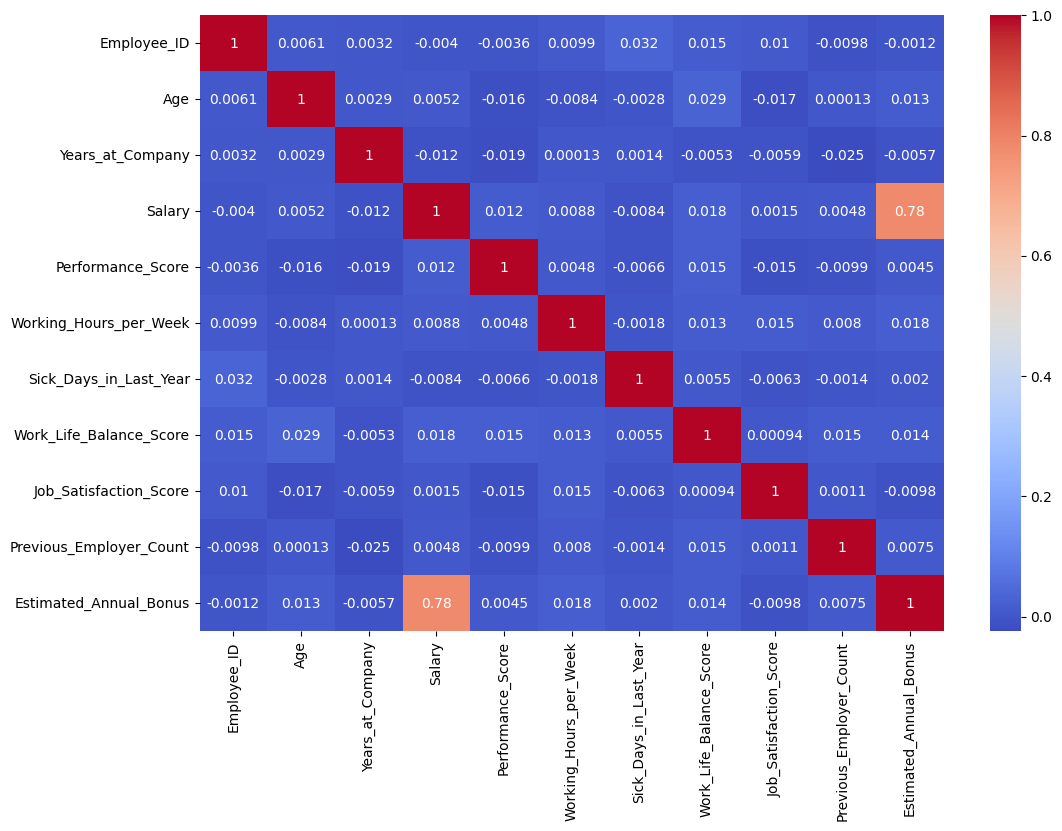

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_sütunlar].corr(),annot=True, cmap='coolwarm')

maaş arttıkça yıllık bonus artar

Text(0, 0.5, 'Frekanslar')

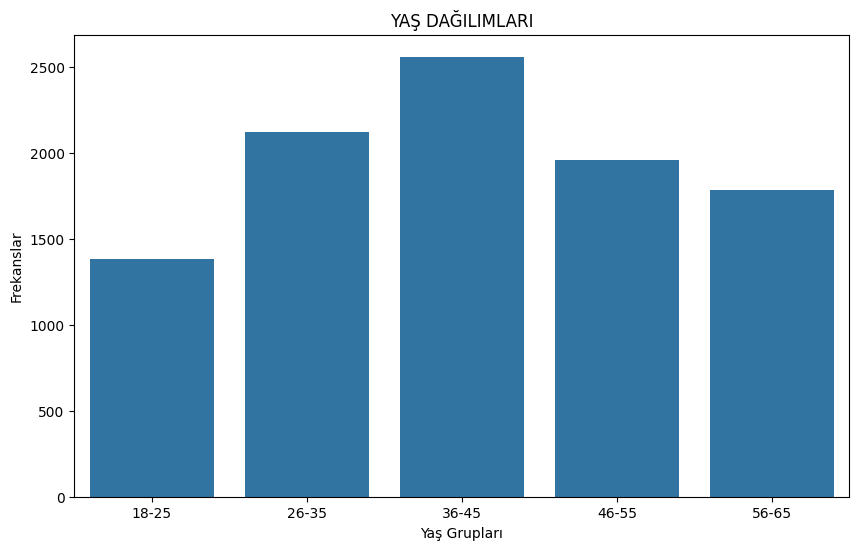

In [43]:
#yaş aralıklarını görselleştirelim
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Yaş_Grupları',order=["18-25","26-35","36-45","46-55","56-65"])
plt.title('YAŞ DAĞILIMLARI')
plt.xlabel('Yaş Grupları')
plt.ylabel('Frekanslar')

şirkete 18-25 yaş arası genç çalışanlar almak şirketin vizyonu doğrultusunda doğru bir sonuç olacaktır. bunun için şirketten 500-600 56-65 yaş arasındaki kişiyi emekli edebiliriz

şirket çalışanlarının şirkete olan bağlılık seviyesinin dağılımına bakalım;

In [44]:
df['Aidiyetlik_Miktarı']

0        2364.011705
1        6779.250000
2        5284.261458
3        3608.114286
4        1341.589744
            ...     
9995    15408.500000
9996    27637.750000
9997    39489.000000
9998    15145.500000
9999     1887.294118
Name: Aidiyetlik_Miktarı, Length: 10000, dtype: float64

Text(0.5, 0, 'şirkete bağlılık oranları')

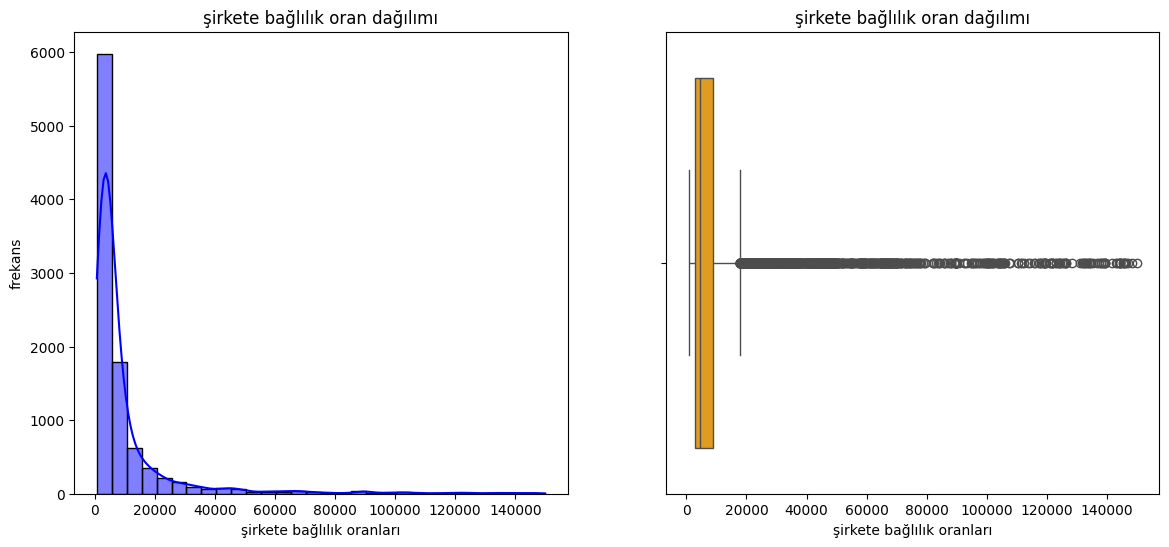

In [47]:
plt.figure(figsize=(14,6))
#subplots()= bir çıktıya birden fazla çıktı-grafik oluşturur
plt.subplot(1,2,1)
sns.histplot(df['Aidiyetlik_Miktarı'],kde=True,bins=30,color='Blue')
plt.title('şirkete bağlılık oran dağılımı')
plt.xlabel("şirkete bağlılık oranları")
plt.ylabel("frekans")
#1. satırın 2. sütun grafiğini ekledik

plt.subplot(1,2,2)
sns.boxplot(x=df['Aidiyetlik_Miktarı'],color='Orange')
plt.title('şirkete bağlılık oran dağılımı')
plt.xlabel("şirkete bağlılık oranları")

In [58]:
df['dept_maaş_ort']=df.groupby('Department')['Salary'].mean().sort_values()
df['dept_maaş_ort']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: dept_maaş_ort, Length: 10000, dtype: float64

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Yaş_Grupları',order=["18-25","26-35","36-45","46-55","56-65"])
plt.title('YAŞ DAĞILIMLARI')
plt.xlabel('Yaş Grupları')
plt.ylabel('Frekanslar')

şirketteki uzman kişilerin yüzdesini görüntüleyelim

In [52]:
senyör_sayıları=df['Senyör_mü'].value_counts()
senyör_sayıları

Senyör_mü
1    5982
0    4018
Name: count, dtype: int64

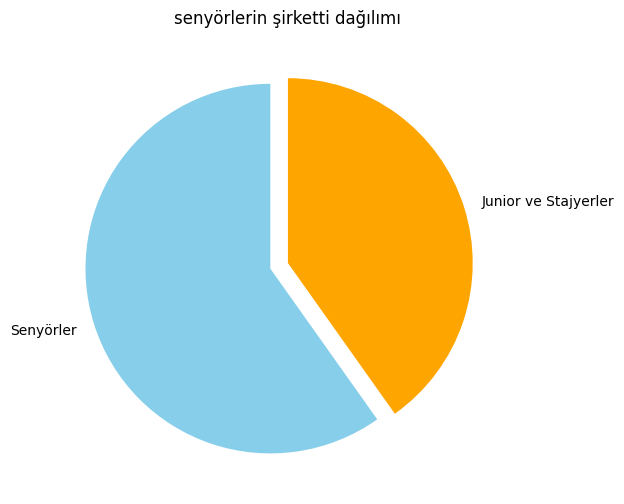

In [54]:
plt.figure(figsize=(6,6))
plt.pie(
    senyör_sayıları,
    labels=['Senyörler','Junior ve Stajyerler'],
    colors=['skyblue','orange'],
    startangle=90,
    explode=[0.1,0]
)
plt.title('senyörlerin şirketti dağılımı')
plt.show()

şirketti yaşlı kişi sayısı çok olduğundan ve bu kişiler senior ve aidiyeti düşük insanlar olduğundan bu kişileri %40 kadar emekli edip bunun yerine stajyer alınabilir